In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
lookback = 5


In [3]:
extract_obj = yf.Ticker("GS")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
def wma(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    for i in range(price_array.size - lookback):
        in_array = (price_array[i:i+lookback])
        sum_val = 0
        for j in range(lookback):
            sum_val += in_array[j]*(j+1)
        out_val = sum_val*2/(lookback*(lookback+1))
        out_array = np.append(out_array,out_val)
    return out_array

In [5]:
start = time.time()
x1 = wma(price_list,lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None 346.47 345.73266666666666 343.686
 340.6673333333334 336.9033333333333 332.862 330.51800000000003 327.618
 328.582 328.4526666666667 328.1186666666666 327.6146666666666
 327.26266666666663 326.67133333333334 327.1886666666667 328.6846666666667
 330.0873333333333 329.51933333333335 331.5733333333334 333.974 336.87
 339.032 338.0853333333333 336.322 334.70533333333333 334.8553333333333
 337.492 340.82733333333334 344.07933333333335 347.4153333333333 348.856
 350.0146666666667 349.62533333333334 351.82533333333333 355.706
 360.45399999999995 365.16999999999996 365.5373333333333 363.686
 361.36133333333333 362.39133333333336 363.99533333333335 365.502
 363.4306666666667 361.7433333333334]


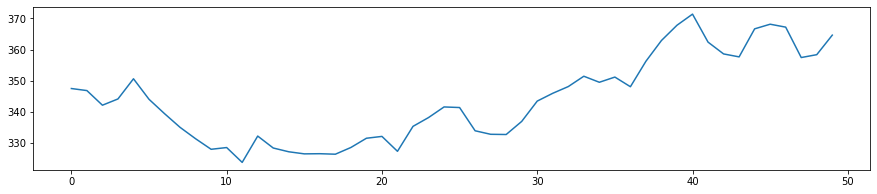

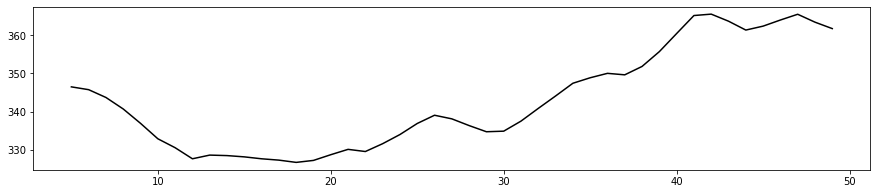

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [7]:
def bol_wma_gen(price_array, lookback, multiplier = 1):
    up_bound_array = np.array([None for i in range(price_array.size)])
    down_bound_array = np.array([None for i in range(price_array.size)])
    
    def wma(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])
        for i in range(price_array.size - lookback):
            in_array = (price_array[i:i+lookback])
            sum_val = 0
            for j in range(lookback):
                sum_val += in_array[j]*(j+1)
            out_val = sum_val*2/(lookback*(lookback+1))
            out_array = np.append(out_array,out_val)
        return out_array
    
    wma_arr = wma(price_array, lookback)
    for i in range(price_array.size - lookback):
        std = np.std(price_array[i:i+lookback])
        up_bound_array[i+lookback] = wma_arr[i+lookback] + (std*multiplier)
        down_bound_array[i+lookback] = wma_arr[i+lookback] - (std*multiplier)

    return up_bound_array,wma_arr,down_bound_array

In [8]:
start = time.time()
up_bol, wma, down_bol = bol_wma_gen(price_array = price_list, lookback = lookback, multiplier = 1.5)
end = time.time()
print(up_bol)
print(wma)
print(down_bol)
indic_generation_time = (end-start)

[None None None None None 350.8379155211611 350.14879506153926
 349.23349078412934 348.50509615189327 347.0560336637873 341.4093595922952
 336.9456426471919 333.23094628515184 333.05231609620614 332.4811807848001
 332.19356126653054 331.75494491818546 330.4699823667498 327.785355774759
 328.3981690436796 331.6537180303181 333.7020980559674 332.9201400023459
 335.80949267877827 339.480903485626 344.2413766692525 346.90628282448625
 342.7342396563302 341.82122994609244 340.86905217831645 339.7982100261105
 343.5627918758594 349.0102566496061 352.71537096641487 354.7533872987931
 353.01800240269034 353.0626784776675 351.7859374155289 355.97739619412914
 363.8508569048204 371.4033358702708 377.6793575374597 373.2709039187744
 370.40010857821045 369.30863287468696 370.0859409256671
 370.28075217379256 372.32613027425475 370.6645830333384
 368.73065857265067]
[None None None None None 346.47 345.73266666666666 343.686
 340.6673333333334 336.9033333333333 332.862 330.51800000000003 327.618
 3

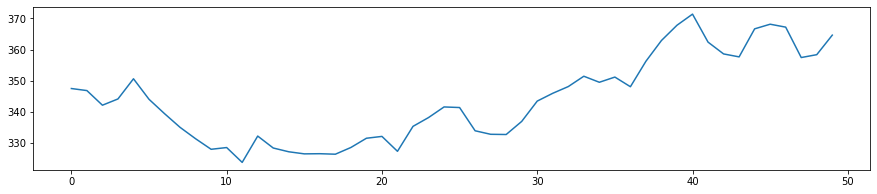

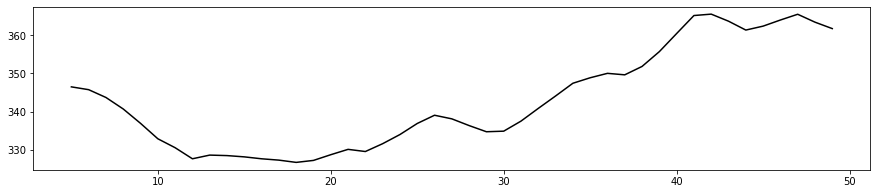

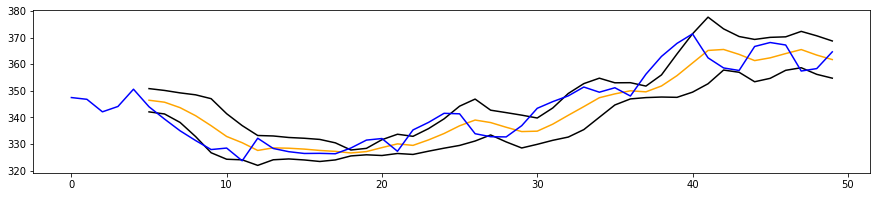

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(wma.size), wma, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')
plt.show()

In [10]:
def current_bias(price_array, up_bound_array, down_bound_array):
    bias = 0
    bias_list = []
    for i,j,k in zip(price_array,up_bound_array, down_bound_array):
        try: 
            if(i >= j):
                bias = 100
            elif(i <= k):
                bias = -100
            elif(i > k and i < j):
                bias = 0
        except TypeError:
            bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [11]:
start = time.time()
bias_array = current_bias(price_array = price_list, up_bound_array = up_bol, down_bound_array = down_bol)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0    0 -100 -100 -100    0    0 -100    0    0
    0    0    0    0  100  100  100    0  100  100  100    0    0 -100
    0    0  100  100    0    0    0    0    0  100  100  100    0    0
    0    0    0    0    0 -100    0    0]


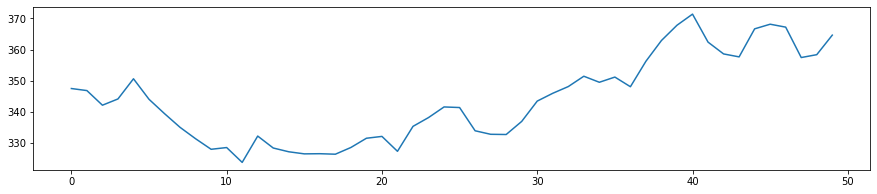

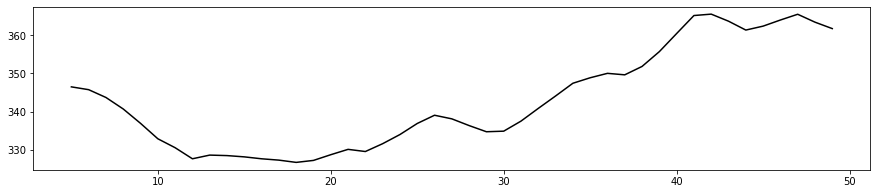

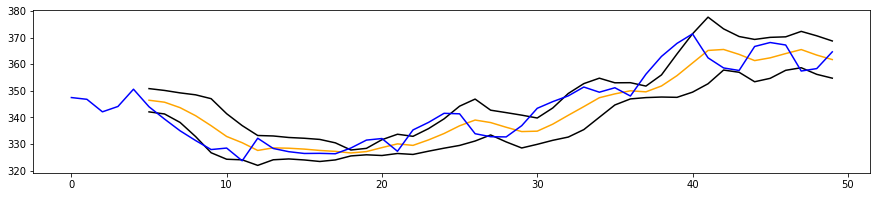

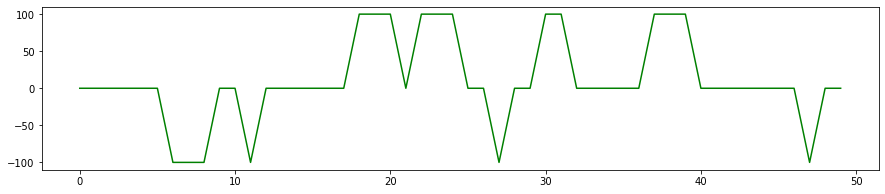

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(wma.size), wma, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()



In [13]:
def efficacy_generator (price_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j in zip(price_array, bias_array):
        if (stop_loss_flag):
            if(j == 100 or j == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
    
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [14]:
start = time.time()
test = efficacy_generator(price_array = price_list, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

1.8726827562084682
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 328.53, 331.5, 332.09, 327.3, 335.32, 338.15, 341.56, 341.37, 0, 0, 0, 0, 343.44, 345.95, 348.11, 0, 0, 0, 0, 356.25, 362.92, 367.82, 371.39, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 339.4, 335.0, 331.34, 327.95, 0, 323.74, 332.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 332.77, 332.7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 357.44, 358.36, 0])


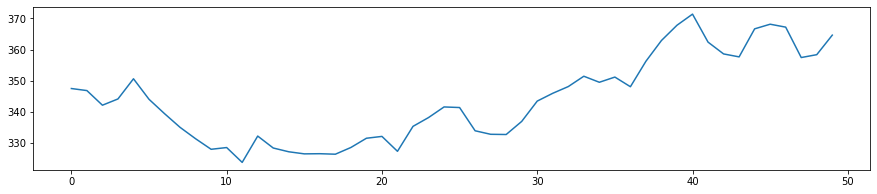

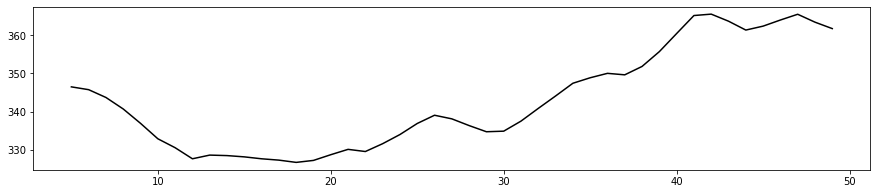

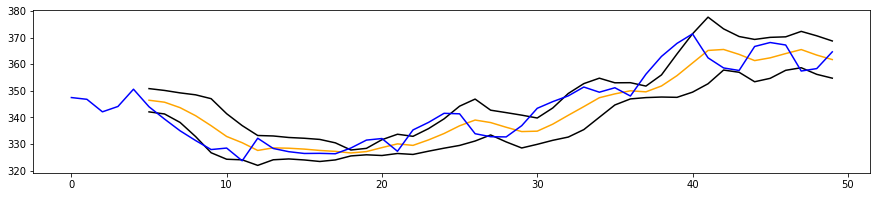

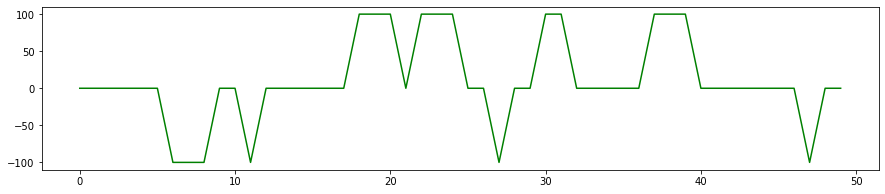

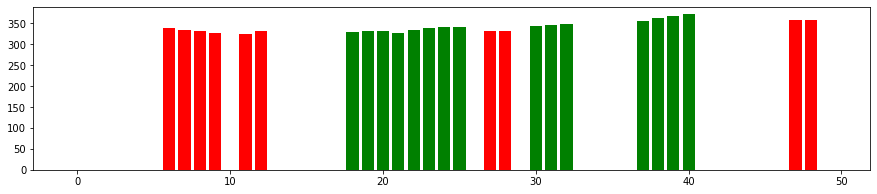

In [15]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(wma.size), wma, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [16]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Indicator Generations Time: " + str(indic_generation_time) + "\n" + 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+indic_generation_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.003997325897216797
Indicator Generations Time: 0.010991811752319336
Bias Load Time: 0.0010013580322265625
Efficacy Value Load time: 0.001997232437133789
Total Time: 0.017987728118896484
